# Market Segmentation Analysis
## Step 4: Exploring Data

In [1]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

[McDonalds dataset](https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv)

Download Dataset or simply use `pd.read_csv(url)`

In [2]:
if not os.path.exists('mcdonalds.csv'):
    data = requests.get('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv').text
    with open('mcdonalds.csv', 'w') as f:
        f.write(data)
    print('mcdonalds.csv [Downloaded now]')
else:
    print('mcdonalds.csv [Already downloaded]')

mcdonalds.csv [Already downloaded]


In [3]:
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
df = df.replace({"Yes": 1, "No": 0})

In [7]:
df1 = df.iloc[:, :11]
df1.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [8]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [9]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,1.956071e-17,-2.934106e-17,3.667633e-17,-7.702029e-17,-8.557810e-18,-3.056361e-19,3.178615e-17,2.322834e-17,-2.170016e-16,-4.829050e-17,-9.780354e-18
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


In [10]:
pd.DataFrame(pca.components_, columns=[f'PC{i}' for i in range(1, 12)], index=pca_df.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


In [11]:
import seaborn as sns

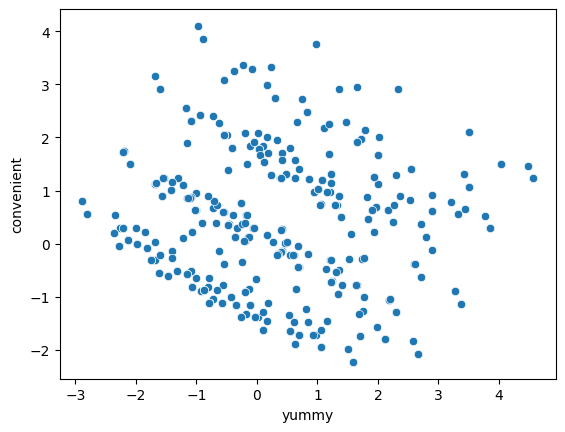

In [12]:
sns.scatterplot(data=pca_df, x='yummy', y='convenient');

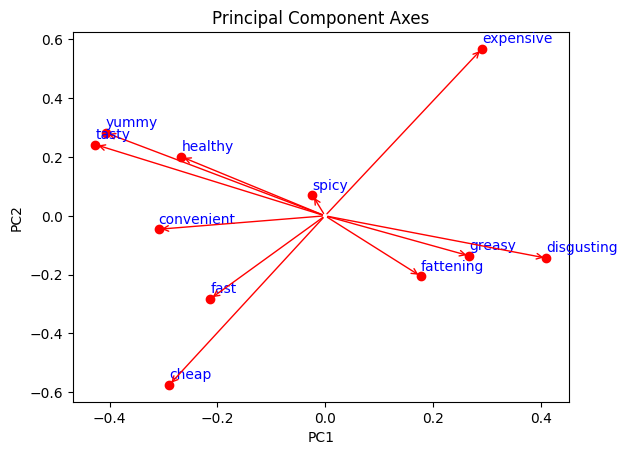

In [13]:
# plt.scatter(x=pca_df['yummy'], y=pca_df['convenient'])

scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(pca.components_[0, :][i]*scale, (pca.components_[1, :][i]+0.02)*scale, j, color='blue')
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate('', xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))
plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')

plt.show()

## Step 5: Extracting Segments
### 5.1. Using k-Means

[Customer Segmentation Using K Means Clustering](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

In [14]:
np.random.seed(0)

In [15]:
from sklearn.cluster import KMeans

k_range = range(2, 9)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    inertias.append(model.inertia_)
    k_result.append(labels)

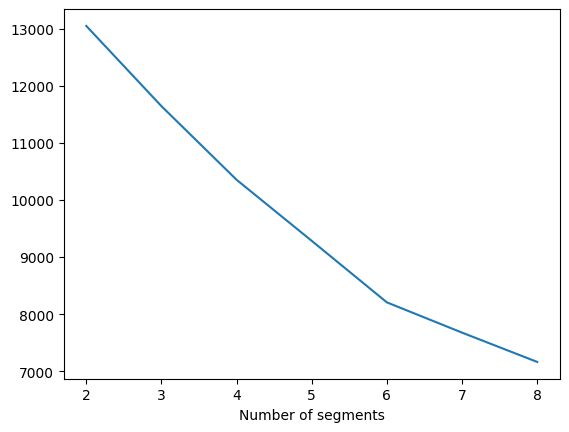

In [16]:
plt.plot(range(2, 9), inertias)
plt.xlabel('Number of segments');

- [Clustering Performance Evaluation in Scikit Learn](https://www.geeksforgeeks.org/clustering-performance-evaluation-in-scikit-learn/)
- [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

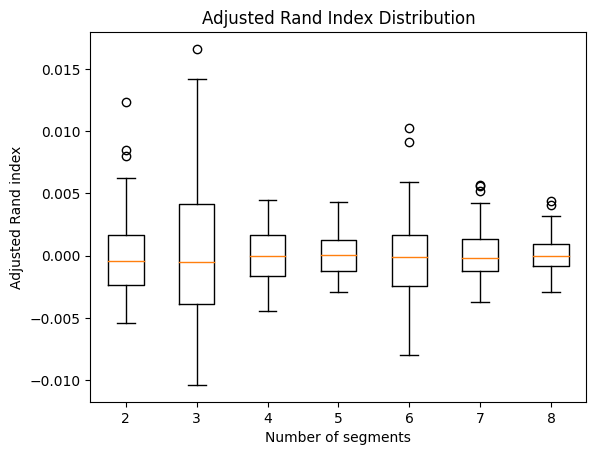

In [17]:
from sklearn.metrics import adjusted_rand_score

n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ari = adjusted_rand_score(labels, random_sample)
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

### 5.2. Using Mixtures of Distributions

In [18]:
# %pip install stepmix

In [19]:
import numpy as np
from stepmix import StepFlexmix
from stepmix.models import FLXMCmvbinary

# Assuming MD.x is your data matrix

# StepFlexmix for model selection
k_values = range(2, 9)
models = []

for k in k_values:
    step_flexmix = StepFlexmix(data=MD.x, cluster=k, model=FLXMCmvbinary(), nrep=10, verbose=False, seed=1234)
    models.append(step_flexmix)

# Access the fitted models
for k, model in zip(k_values, models):
    print(f'Number of Clusters: {k}')
    print(model.fitted)

ImportError: cannot import name 'StepFlexmix' from 'stepmix' (/home/adhiban/Documents/base/lib/python3.10/site-packages/stepmix/__init__.py)